Ejecutado en Google Colaboratory en GPU

## Import Libraries

In [0]:
# Keras Datasets: 
#    https://jovianlin.io/datasets-within-keras/
from keras.datasets import cifar10

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils

# Set random seed (for reproducibility):
#     https://machinelearningmastery.com/reproducible-results-neural-networks-keras/
import numpy as np
np.random.seed(42)

import time

Using TensorFlow backend.


## Load Data

#### Number of clases

In [0]:
num_classes = 10

#### Load training and test datasets

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#### Print shape of the data

In [0]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


#### Format Y data: convert class vectors to binary class matrices

In [0]:
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

## Plot Training Results

#### Import plot libraries

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

# Optional: Seaborn is a Python data visualization library based on matplotlib 
#    https://seaborn.pydata.org/
import seaborn as sns
sns.set()

#### Plot method

In [0]:
def plot_history(history):
    
    # Plot training & validation accuracy values
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

## Convolutional Model Definition

In [0]:
# Compile method doc: https://keras.io/models/sequential/
# Optimizers doc: https://keras.io/optimizers/

In [0]:
# Input image dimensions
_, img_rows, img_cols, img_channels = X_train.shape

In [0]:
def create_model():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(img_rows, img_cols, img_channels), data_format='channels_last'))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(16, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(16, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(8, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(8, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    
    return model

## Create a model and print model-summary

In [0]:
model=create_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 16)        4624      
__________

## Example of Training:

In [0]:
batch_size = 128
nb_epoch = 10

import tensorflow as tf

tf.Session(config=tf.ConfigProto(intra_op_parallelism_threads=4))


In [0]:
model = create_model()

# Keras fit function documentation: https://keras.io/models/sequential/
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    verbose=1,
                    validation_data=(X_test, y_test),
                    shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 13s 263us/step - loss: 2.4959 - acc: 0.1209 - val_loss: 2.1562 - val_acc: 0.1766
Epoch 2/10
50000/50000 [==============================] - 11s 216us/step - loss: 2.0713 - acc: 0.2074 - val_loss: 1.8643 - val_acc: 0.3044
Epoch 3/10
50000/50000 [==============================] - 11s 215us/step - loss: 1.8239 - acc: 0.3019 - val_loss: 1.6584 - val_acc: 0.3809
Epoch 4/10
50000/50000 [==============================] - 11s 213us/step - loss: 1.7018 - acc: 0.3552 - val_loss: 1.6162 - val_acc: 0.4000
Epoch 5/10
50000/50000 [==============================] - 11s 212us/step - loss: 1.6020 - acc: 0.3989 - val_loss: 1.4855 - val_acc: 0.4517
Epoch 6/10
50000/50000 [==============================] - 11s 213us/step - loss: 1.5272 - acc: 0.4349 - val_loss: 1.4184 - val_acc: 0.4781
Epoch 7/10
50000/50000 [==============================] - 11s 212us/step - loss: 1.4632 - acc: 0.4604 - val_loss: 1.

#### Evaluate trained model with test data

In [0]:
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 136us/step
Test loss: 1.284354698753357
Test accuracy: 0.5423


#### Plot training history

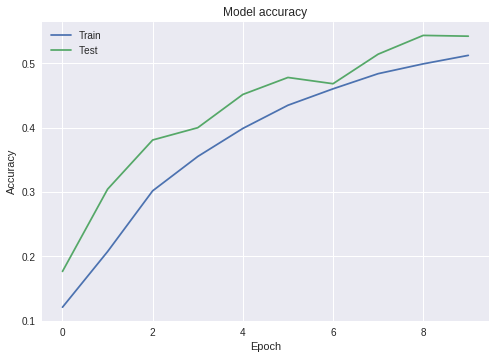

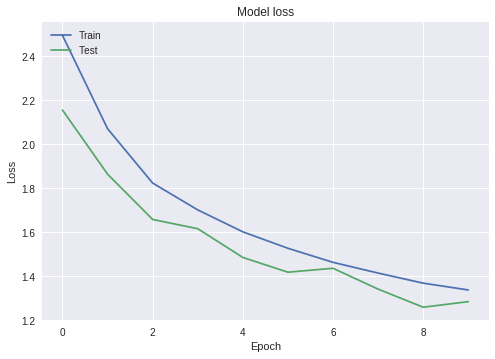

In [0]:
plot_history(history)

## Batch 8

In [0]:
batch_size = 8
nb_epoch = 10



modelo = create_model()


# tiempo inicial
t0 = time.time()
# Keras fit function documentation: https://keras.io/models/sequential/
history = modelo.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    verbose=2,
                    validation_data=(X_test, y_test),
                    shuffle=True)
tf =  time.time()

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
 - 74s - loss: 2.1239 - acc: 0.1857 - val_loss: 1.9503 - val_acc: 0.2614
Epoch 2/10
 - 73s - loss: 1.8131 - acc: 0.3080 - val_loss: 1.6685 - val_acc: 0.3640
Epoch 3/10
 - 73s - loss: 1.7202 - acc: 0.3454 - val_loss: 1.5804 - val_acc: 0.3993
Epoch 4/10
 - 73s - loss: 1.6693 - acc: 0.3759 - val_loss: 1.5136 - val_acc: 0.4382
Epoch 5/10
 - 73s - loss: 1.6397 - acc: 0.3877 - val_loss: 1.5013 - val_acc: 0.4508
Epoch 6/10
 - 73s - loss: 1.6163 - acc: 0.3947 - val_loss: 1.5218 - val_acc: 0.4352
Epoch 7/10
 - 74s - loss: 1.6156 - acc: 0.3988 - val_loss: 1.5002 - val_acc: 0.4418
Epoch 8/10
 - 73s - loss: 1.6032 - acc: 0.4070 - val_loss: 1.5117 - val_acc: 0.4553
Epoch 9/10
 - 73s - loss: 1.5838 - acc: 0.4145 - val_loss: 1.4779 - val_acc: 0.4638
Epoch 10/10
 - 73s - loss: 1.5894 - acc: 0.4125 - val_loss: 1.4669 - val_acc: 0.4598


#### Evaluate trained model with test data

In [38]:
score = modelo.evaluate(X_test, y_test)
time_delta = tf-t0
exec("batch_size_" + str(batch_size) + "= batch_size")
exec("test_loss_" + str(batch_size) + "= score[0]")
exec("test_acc_" + str(batch_size) + "= score[1]")
exec("td_" + str(batch_size) + "= time_delta")


print("batch_size: ", batch_size, ", score: ", score, ", time_delta: ", time_delta)

10000/10000 [==============================] - 1s 146us/step
batch_size:  4096 , score:  [2.1556944664001465, 0.2263] , time_delta:  58.73594355583191


## Batch 16

In [0]:
batch_size = 16
nb_epoch = 10



modelo = create_model()


# tiempo inicial
t0 = time.time()
# Keras fit function documentation: https://keras.io/models/sequential/
history = modelo.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    verbose=2,
                    validation_data=(X_test, y_test),
                    shuffle=True)
tf =  time.time()

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
 - 40s - loss: 2.3136 - acc: 0.2189 - val_loss: 1.7748 - val_acc: 0.3308
Epoch 2/10
 - 39s - loss: 1.7129 - acc: 0.3540 - val_loss: 1.5542 - val_acc: 0.4143
Epoch 3/10
 - 39s - loss: 1.5983 - acc: 0.4025 - val_loss: 1.5462 - val_acc: 0.4403
Epoch 4/10
 - 39s - loss: 1.5285 - acc: 0.4359 - val_loss: 1.4378 - val_acc: 0.4850
Epoch 5/10
 - 39s - loss: 1.4678 - acc: 0.4601 - val_loss: 1.3432 - val_acc: 0.5146
Epoch 6/10
 - 39s - loss: 1.4360 - acc: 0.4761 - val_loss: 1.3309 - val_acc: 0.5185
Epoch 7/10
 - 39s - loss: 1.4064 - acc: 0.4894 - val_loss: 1.2946 - val_acc: 0.5240
Epoch 8/10
 - 39s - loss: 1.3898 - acc: 0.4959 - val_loss: 1.2868 - val_acc: 0.5344
Epoch 9/10
 - 39s - loss: 1.3678 - acc: 0.5053 - val_loss: 1.3108 - val_acc: 0.5314
Epoch 10/10
 - 39s - loss: 1.3569 - acc: 0.5092 - val_loss: 1.2539 - val_acc: 0.5530


#### Evaluate trained model with test data

In [0]:
score = modelo.evaluate(X_test, y_test)
time_delta = tf-t0
exec("batch_size_" + str(batch_size) + "= batch_size")
exec("test_loss_" + str(batch_size) + "= score[0]")
exec("test_acc_" + str(batch_size) + "= score[1]")
exec("td_" + str(batch_size) + "= time_delta")


print("batch_size: ", batch_size, ", score: ", score, ", time_delta: ", time_delta)

10000/10000 [==============================] - 1s 140us/step
batch_size:  16 , score:  [1.253862951850891, 0.553] , time_delta:  393.1791112422943


## Batch 32

In [19]:
batch_size = 32
nb_epoch = 10



modelo = create_model()


# tiempo inicial
t0 = time.time()
# Keras fit function documentation: https://keras.io/models/sequential/
history = modelo.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    verbose=2,
                    validation_data=(X_test, y_test),
                    shuffle=True)
tf =  time.time()

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
 - 24s - loss: 2.3209 - acc: 0.1714 - val_loss: 1.9314 - val_acc: 0.2717
Epoch 2/10
 - 23s - loss: 1.8382 - acc: 0.3050 - val_loss: 1.6625 - val_acc: 0.3764
Epoch 3/10
 - 23s - loss: 1.6650 - acc: 0.3746 - val_loss: 1.5080 - val_acc: 0.4493
Epoch 4/10
 - 23s - loss: 1.5620 - acc: 0.4193 - val_loss: 1.4360 - val_acc: 0.4780
Epoch 5/10
 - 23s - loss: 1.4936 - acc: 0.4478 - val_loss: 1.3470 - val_acc: 0.5047
Epoch 6/10
 - 23s - loss: 1.4534 - acc: 0.4673 - val_loss: 1.3653 - val_acc: 0.5199
Epoch 7/10
 - 23s - loss: 1.4092 - acc: 0.4846 - val_loss: 1.2868 - val_acc: 0.5405
Epoch 8/10
 - 23s - loss: 1.3815 - acc: 0.4980 - val_loss: 1.3099 - val_acc: 0.5288
Epoch 9/10
 - 23s - loss: 1.3474 - acc: 0.5101 - val_loss: 1.2207 - val_acc: 0.5647
Epoch 10/10
 - 23s - loss: 1.3355 - acc: 0.5161 - val_loss: 1.2677 - val_acc: 0.5538


#### Evaluate trained model with test data

In [20]:
score = modelo.evaluate(X_test, y_test)
time_delta = tf-t0
exec("batch_size_" + str(batch_size) + "= batch_size")
exec("test_loss_" + str(batch_size) + "= score[0]")
exec("test_acc_" + str(batch_size) + "= score[1]")
exec("td_" + str(batch_size) + "= time_delta")


print("batch_size: ", batch_size, ", score: ", score, ", time_delta: ", time_delta)

10000/10000 [==============================] - 1s 144us/step
batch_size:  32 , score:  [1.2676858221054077, 0.5538] , time_delta:  229.92945837974548


## Batch 64

In [21]:
batch_size = 64
nb_epoch = 10



modelo = create_model()


# tiempo inicial
t0 = time.time()
# Keras fit function documentation: https://keras.io/models/sequential/
history = modelo.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    verbose=2,
                    validation_data=(X_test, y_test),
                    shuffle=True)
tf =  time.time()

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
 - 15s - loss: 2.4065 - acc: 0.1701 - val_loss: 2.0923 - val_acc: 0.2121
Epoch 2/10
 - 13s - loss: 1.8906 - acc: 0.2747 - val_loss: 1.8360 - val_acc: 0.3028
Epoch 3/10
 - 13s - loss: 1.7768 - acc: 0.3220 - val_loss: 1.7294 - val_acc: 0.3591
Epoch 4/10
 - 13s - loss: 1.6657 - acc: 0.3713 - val_loss: 1.5256 - val_acc: 0.4326
Epoch 5/10
 - 13s - loss: 1.5885 - acc: 0.4067 - val_loss: 1.5016 - val_acc: 0.4408
Epoch 6/10
 - 13s - loss: 1.5324 - acc: 0.4298 - val_loss: 1.4379 - val_acc: 0.4654
Epoch 7/10
 - 13s - loss: 1.4827 - acc: 0.4530 - val_loss: 1.3674 - val_acc: 0.4980
Epoch 8/10
 - 13s - loss: 1.4444 - acc: 0.4689 - val_loss: 1.3319 - val_acc: 0.5135
Epoch 9/10
 - 13s - loss: 1.4076 - acc: 0.4821 - val_loss: 1.2995 - val_acc: 0.5245
Epoch 10/10
 - 13s - loss: 1.3748 - acc: 0.5015 - val_loss: 1.3608 - val_acc: 0.5116


#### Evaluate trained model with test data

In [22]:
score = modelo.evaluate(X_test, y_test)
time_delta = tf-t0
exec("batch_size_" + str(batch_size) + "= batch_size")
exec("test_loss_" + str(batch_size) + "= score[0]")
exec("test_acc_" + str(batch_size) + "= score[1]")
exec("td_" + str(batch_size) + "= time_delta")


print("batch_size: ", batch_size, ", score: ", score, ", time_delta: ", time_delta)

10000/10000 [==============================] - 1s 129us/step
batch_size:  64 , score:  [1.360800884628296, 0.5116] , time_delta:  135.33627939224243


## Batch 128

In [23]:
batch_size = 128
nb_epoch = 10



modelo = create_model()


# tiempo inicial
t0 = time.time()
# Keras fit function documentation: https://keras.io/models/sequential/
history = modelo.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    verbose=2,
                    validation_data=(X_test, y_test),
                    shuffle=True)
tf =  time.time()

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
 - 11s - loss: 2.3285 - acc: 0.1597 - val_loss: 1.9452 - val_acc: 0.2699
Epoch 2/10
 - 9s - loss: 1.8324 - acc: 0.3033 - val_loss: 1.7163 - val_acc: 0.3664
Epoch 3/10
 - 9s - loss: 1.6837 - acc: 0.3631 - val_loss: 1.6708 - val_acc: 0.3834
Epoch 4/10
 - 9s - loss: 1.5902 - acc: 0.4021 - val_loss: 1.4730 - val_acc: 0.4590
Epoch 5/10
 - 9s - loss: 1.5345 - acc: 0.4281 - val_loss: 1.4172 - val_acc: 0.4796
Epoch 6/10
 - 9s - loss: 1.4641 - acc: 0.4557 - val_loss: 1.3746 - val_acc: 0.5008
Epoch 7/10
 - 9s - loss: 1.4096 - acc: 0.4805 - val_loss: 1.2842 - val_acc: 0.5355
Epoch 8/10
 - 9s - loss: 1.3538 - acc: 0.5034 - val_loss: 1.3265 - val_acc: 0.5154
Epoch 9/10
 - 9s - loss: 1.3240 - acc: 0.5168 - val_loss: 1.2073 - val_acc: 0.5684
Epoch 10/10
 - 9s - loss: 1.2891 - acc: 0.5333 - val_loss: 1.1889 - val_acc: 0.5807


#### Evaluate trained model with test data

In [24]:
score = modelo.evaluate(X_test, y_test)
time_delta = tf-t0
exec("batch_size_" + str(batch_size) + "= batch_size")
exec("test_loss_" + str(batch_size) + "= score[0]")
exec("test_acc_" + str(batch_size) + "= score[1]")
exec("td_" + str(batch_size) + "= time_delta")


print("batch_size: ", batch_size, ", score: ", score, ", time_delta: ", time_delta)

10000/10000 [==============================] - 1s 123us/step
batch_size:  128 , score:  [1.1889110813140868, 0.5807] , time_delta:  95.365478515625


## Batch 256

In [25]:
batch_size = 256
nb_epoch = 10



modelo = create_model()


# tiempo inicial
t0 = time.time()
# Keras fit function documentation: https://keras.io/models/sequential/
history = modelo.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    verbose=2,
                    validation_data=(X_test, y_test),
                    shuffle=True)
tf =  time.time()

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
 - 9s - loss: 2.5363 - acc: 0.1054 - val_loss: 2.2627 - val_acc: 0.1670
Epoch 2/10
 - 7s - loss: 2.2041 - acc: 0.1686 - val_loss: 2.1555 - val_acc: 0.1876
Epoch 3/10
 - 7s - loss: 2.0587 - acc: 0.2279 - val_loss: 1.9196 - val_acc: 0.2876
Epoch 4/10
 - 7s - loss: 1.8528 - acc: 0.2932 - val_loss: 1.7336 - val_acc: 0.3481
Epoch 5/10
 - 7s - loss: 1.7502 - acc: 0.3246 - val_loss: 1.6919 - val_acc: 0.3591
Epoch 6/10
 - 7s - loss: 1.6879 - acc: 0.3533 - val_loss: 1.6269 - val_acc: 0.3882
Epoch 7/10
 - 7s - loss: 1.6312 - acc: 0.3794 - val_loss: 1.5454 - val_acc: 0.4126
Epoch 8/10
 - 7s - loss: 1.5738 - acc: 0.4057 - val_loss: 1.4971 - val_acc: 0.4419
Epoch 9/10
 - 7s - loss: 1.5275 - acc: 0.4277 - val_loss: 1.4293 - val_acc: 0.4629
Epoch 10/10
 - 7s - loss: 1.4843 - acc: 0.4478 - val_loss: 1.4490 - val_acc: 0.4640


#### Evaluate trained model with test data

In [26]:
score = modelo.evaluate(X_test, y_test)
time_delta = tf-t0
exec("batch_size_" + str(batch_size) + "= batch_size")
exec("test_loss_" + str(batch_size) + "= score[0]")
exec("test_acc_" + str(batch_size) + "= score[1]")
exec("td_" + str(batch_size) + "= time_delta")


print("batch_size: ", batch_size, ", score: ", score, ", time_delta: ", time_delta)

10000/10000 [==============================] - 1s 126us/step
batch_size:  256 , score:  [1.4490186359405517, 0.464] , time_delta:  73.7788577079773


## Batch 512

In [27]:
batch_size = 512
nb_epoch = 10



modelo = create_model()


# tiempo inicial
t0 = time.time()
# Keras fit function documentation: https://keras.io/models/sequential/
history = modelo.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    verbose=2,
                    validation_data=(X_test, y_test),
                    shuffle=True)
tf =  time.time()

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
 - 8s - loss: 2.8524 - acc: 0.1047 - val_loss: 2.3008 - val_acc: 0.1294
Epoch 2/10
 - 6s - loss: 2.2594 - acc: 0.1332 - val_loss: 2.0951 - val_acc: 0.2223
Epoch 3/10
 - 6s - loss: 2.0152 - acc: 0.2209 - val_loss: 1.8522 - val_acc: 0.2934
Epoch 4/10
 - 6s - loss: 1.8674 - acc: 0.2739 - val_loss: 1.7324 - val_acc: 0.3497
Epoch 5/10
 - 6s - loss: 1.7790 - acc: 0.3175 - val_loss: 1.6666 - val_acc: 0.3795
Epoch 6/10
 - 6s - loss: 1.7179 - acc: 0.3455 - val_loss: 1.6054 - val_acc: 0.3990
Epoch 7/10
 - 6s - loss: 1.6677 - acc: 0.3715 - val_loss: 1.5600 - val_acc: 0.4255
Epoch 8/10
 - 6s - loss: 1.6241 - acc: 0.3935 - val_loss: 1.5162 - val_acc: 0.4474
Epoch 9/10
 - 6s - loss: 1.5853 - acc: 0.4058 - val_loss: 1.4777 - val_acc: 0.4654
Epoch 10/10
 - 6s - loss: 1.5436 - acc: 0.4229 - val_loss: 1.4206 - val_acc: 0.4775


#### Evaluate trained model with test data

In [28]:
score = modelo.evaluate(X_test, y_test)
time_delta = tf-t0
exec("batch_size_" + str(batch_size) + "= batch_size")
exec("test_loss_" + str(batch_size) + "= score[0]")
exec("test_acc_" + str(batch_size) + "= score[1]")
exec("td_" + str(batch_size) + "= time_delta")


print("batch_size: ", batch_size, ", score: ", score, ", time_delta: ", time_delta)

10000/10000 [==============================] - 1s 129us/step
batch_size:  512 , score:  [1.4205513601303101, 0.4775] , time_delta:  63.95291781425476


## Batch 1024

In [29]:
batch_size = 1024
nb_epoch = 10



modelo = create_model()


# tiempo inicial
t0 = time.time()
# Keras fit function documentation: https://keras.io/models/sequential/
history = modelo.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    verbose=2,
                    validation_data=(X_test, y_test),
                    shuffle=True)
tf =  time.time()

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
 - 9s - loss: 2.8196 - acc: 0.1054 - val_loss: 2.2888 - val_acc: 0.1391
Epoch 2/10
 - 6s - loss: 2.2320 - acc: 0.1428 - val_loss: 2.2033 - val_acc: 0.1989
Epoch 3/10
 - 6s - loss: 2.1626 - acc: 0.1918 - val_loss: 2.1193 - val_acc: 0.2228
Epoch 4/10
 - 6s - loss: 2.0800 - acc: 0.2200 - val_loss: 1.9843 - val_acc: 0.2802
Epoch 5/10
 - 6s - loss: 1.9542 - acc: 0.2701 - val_loss: 2.0187 - val_acc: 0.2535
Epoch 6/10
 - 6s - loss: 1.8448 - acc: 0.3027 - val_loss: 1.8069 - val_acc: 0.3262
Epoch 7/10
 - 6s - loss: 1.7740 - acc: 0.3264 - val_loss: 1.8039 - val_acc: 0.3280
Epoch 8/10
 - 6s - loss: 1.7134 - acc: 0.3466 - val_loss: 1.6290 - val_acc: 0.3824
Epoch 9/10
 - 6s - loss: 1.6782 - acc: 0.3631 - val_loss: 1.6222 - val_acc: 0.3937
Epoch 10/10
 - 6s - loss: 1.6399 - acc: 0.3791 - val_loss: 1.5745 - val_acc: 0.4135


#### Evaluate trained model with test data

In [30]:
score = modelo.evaluate(X_test, y_test)
time_delta = tf-t0
exec("batch_size_" + str(batch_size) + "= batch_size")
exec("test_loss_" + str(batch_size) + "= score[0]")
exec("test_acc_" + str(batch_size) + "= score[1]")
exec("td_" + str(batch_size) + "= time_delta")


print("batch_size: ", batch_size, ", score: ", score, ", time_delta: ", time_delta)

10000/10000 [==============================] - 1s 129us/step
batch_size:  1024 , score:  [1.5745391204833985, 0.4135] , time_delta:  61.06731677055359


## Batch 2048

In [31]:
batch_size = 2048
nb_epoch = 10



modelo = create_model()


# tiempo inicial
t0 = time.time()
# Keras fit function documentation: https://keras.io/models/sequential/
history = modelo.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    verbose=2,
                    validation_data=(X_test, y_test),
                    shuffle=True)
tf =  time.time()

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
 - 9s - loss: 4.0060 - acc: 0.0988 - val_loss: 2.3029 - val_acc: 0.1030
Epoch 2/10
 - 5s - loss: 2.3030 - acc: 0.1037 - val_loss: 2.3026 - val_acc: 0.1006
Epoch 3/10
 - 5s - loss: 2.3015 - acc: 0.1092 - val_loss: 2.3008 - val_acc: 0.1099
Epoch 4/10
 - 5s - loss: 2.2976 - acc: 0.1157 - val_loss: 2.2851 - val_acc: 0.1239
Epoch 5/10
 - 5s - loss: 2.2714 - acc: 0.1303 - val_loss: 2.2102 - val_acc: 0.1765
Epoch 6/10
 - 5s - loss: 2.1956 - acc: 0.1753 - val_loss: 2.1273 - val_acc: 0.2069
Epoch 7/10
 - 5s - loss: 2.1175 - acc: 0.2064 - val_loss: 2.0464 - val_acc: 0.2487
Epoch 8/10
 - 5s - loss: 2.0242 - acc: 0.2363 - val_loss: 1.9045 - val_acc: 0.2836
Epoch 9/10
 - 5s - loss: 1.9436 - acc: 0.2538 - val_loss: 1.8374 - val_acc: 0.3078
Epoch 10/10
 - 5s - loss: 1.8628 - acc: 0.2748 - val_loss: 1.7637 - val_acc: 0.3472


#### Evaluate trained model with test data

In [32]:
score = modelo.evaluate(X_test, y_test)
time_delta = tf-t0
exec("batch_size_" + str(batch_size) + "= batch_size")
exec("test_loss_" + str(batch_size) + "= score[0]")
exec("test_acc_" + str(batch_size) + "= score[1]")
exec("td_" + str(batch_size) + "= time_delta")


print("batch_size: ", batch_size, ", score: ", score, ", time_delta: ", time_delta)

10000/10000 [==============================] - 1s 134us/step
batch_size:  2048 , score:  [1.763734799194336, 0.3472] , time_delta:  59.48338770866394


## Batch 4096

In [39]:
batch_size = 4096
nb_epoch = 10



modelo = create_model()


# tiempo inicial
t0 = time.time()
# Keras fit function documentation: https://keras.io/models/sequential/
history = modelo.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    verbose=2,
                    validation_data=(X_test, y_test),
                    shuffle=True)
tf =  time.time()

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
 - 7s - loss: 8.5913 - acc: 0.1077 - val_loss: 2.3012 - val_acc: 0.1136
Epoch 2/10
 - 5s - loss: 2.3384 - acc: 0.1065 - val_loss: 2.3002 - val_acc: 0.1188
Epoch 3/10
 - 5s - loss: 2.3016 - acc: 0.1077 - val_loss: 2.2997 - val_acc: 0.1213
Epoch 4/10
 - 5s - loss: 2.2968 - acc: 0.1109 - val_loss: 2.2960 - val_acc: 0.1455
Epoch 5/10
 - 5s - loss: 2.2876 - acc: 0.1230 - val_loss: 2.2838 - val_acc: 0.1532
Epoch 6/10
 - 5s - loss: 2.2689 - acc: 0.1372 - val_loss: 2.2508 - val_acc: 0.1632
Epoch 7/10
 - 5s - loss: 2.2422 - acc: 0.1508 - val_loss: 2.2258 - val_acc: 0.1788
Epoch 8/10
 - 5s - loss: 2.2201 - acc: 0.1624 - val_loss: 2.1887 - val_acc: 0.1963
Epoch 9/10
 - 5s - loss: 2.1936 - acc: 0.1715 - val_loss: 2.1580 - val_acc: 0.2141
Epoch 10/10
 - 5s - loss: 2.1679 - acc: 0.1833 - val_loss: 2.1263 - val_acc: 0.2241


#### Evaluate trained model with test data

In [34]:
score = modelo.evaluate(X_test, y_test)
time_delta = tf-t0
exec("batch_size_" + str(batch_size) + "= batch_size")
exec("test_loss_" + str(batch_size) + "= score[0]")
exec("test_acc_" + str(batch_size) + "= score[1]")
exec("td_" + str(batch_size) + "= time_delta")


print("batch_size: ", batch_size, ", score: ", score, ", time_delta: ", time_delta)

10000/10000 [==============================] - 1s 134us/step
batch_size:  4096 , score:  [2.1556944664001465, 0.2263] , time_delta:  58.73594355583191


In [0]:
batch_size_list = [batch_size_8, batch_size_16, batch_size_32, batch_size_64, batch_size_128, batch_size_256, batch_size_512, batch_size_1024, batch_size_2048, batch_size_4096]
test_loss_list = [test_loss_8, test_loss_16, test_loss_32, test_loss_64, test_loss_128, test_loss_256, test_loss_512, test_loss_1024, test_loss_2048, test_loss_4096]
test_acc_list = [test_acc_8, test_acc_16, test_acc_32, test_acc_64, test_acc_128, test_acc_256, test_acc_512, test_acc_1024, test_acc_2048, test_acc_4096]
td_list = [td_8, td_16, td_32, td_64, td_128, td_256, td_512, td_1024, td_2048, td_4096]

In [41]:
print(batch_size_list)
print(test_loss_list)
print(test_acc_list)
print(td_list)

[8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]
[1.4668790264129639, 1.253862951850891, 1.2676858221054077, 1.360800884628296, 1.1889110813140868, 1.4490186359405517, 1.4205513601303101, 1.5745391204833985, 1.763734799194336, 2.1556944664001465]
[0.4598, 0.553, 0.5538, 0.5116, 0.5807, 0.464, 0.4775, 0.4135, 0.3472, 0.2263]
[735.5136616230011, 393.1791112422943, 229.92945837974548, 135.33627939224243, 95.365478515625, 73.7788577079773, 63.95291781425476, 61.06731677055359, 59.48338770866394, 58.73594355583191]


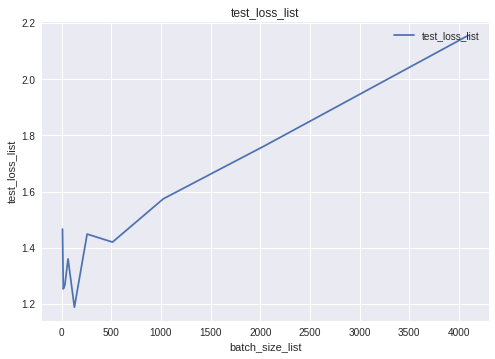

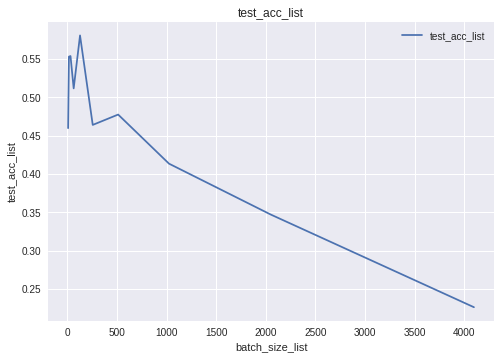

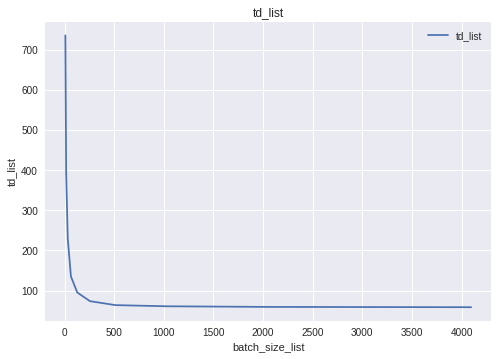

In [42]:
# Plot training & validation accuracy values
plt.plot(batch_size_list,test_loss_list)
plt.title('test_loss_list')
plt.ylabel('test_loss_list')
plt.xlabel('batch_size_list')
plt.legend(['test_loss_list'], loc='upper right')
plt.show()

plt.plot(batch_size_list,test_acc_list)
plt.title('test_acc_list')
plt.ylabel('test_acc_list')
plt.xlabel('batch_size_list')
plt.legend(['test_acc_list'], loc='upper right')
plt.show()

plt.plot(batch_size_list,td_list)
plt.title('td_list')
plt.ylabel('td_list')
plt.xlabel('batch_size_list')
plt.legend(['td_list'], loc='upper right')
plt.show()